In [1]:
!nvidia-smi

Sun Apr 23 09:01:24 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 515.48.07    Driver Version: 515.48.07    CUDA Version: 11.7     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-PCI...  Off  | 00000000:21:00.0 Off |                    0 |
| N/A   22C    P0    38W / 250W |     78MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
import time
import torch
import gym
import numpy as np
import matplotlib.pyplot as plt

from DQN import neural_net, DQN, lr, MEMORY_SIZE
from atari_wrappers import modify_env
from replay_memory import ReplayMemory

In [3]:
# create environment
DEFAULT_ENV_NAME = "PongNoFrameskip-v4"
env = gym.make(DEFAULT_ENV_NAME)
env = modify_env(env)

# set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# create networks
# if the file exists, load the model
if os.path.exists("dqn_pong_model"):
    print("Loading model...")
    policy_net = torch.load("dqn_pong_model")
else:
    policy_net = neural_net(n_actions=4).to(device)
target_net = neural_net(n_actions=4).to(device)
target_net.load_state_dict(policy_net.state_dict())

# setup optimizer
optimizer = torch.optim.Adam(policy_net.parameters(), lr=lr)

# initialize replay memory
memory = ReplayMemory(MEMORY_SIZE)

# train model
model = DQN(policy_net, target_net, optimizer, memory, device, n_actions=4)
model.train(env, 30)
# torch.save(model.policy_net, "dqn_pong_model")

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]


Loading model...
Total steps: 1003 	 Episode: 0/1003 	 Total reward: -20.0
Total steps: 1885 	 Episode: 1/882 	 Total reward: -21.0
Total steps: 2764 	 Episode: 2/879 	 Total reward: -21.0
Total steps: 3742 	 Episode: 3/978 	 Total reward: -19.0
Total steps: 4720 	 Episode: 4/978 	 Total reward: -20.0
Total steps: 5910 	 Episode: 5/1190 	 Total reward: -19.0
Total steps: 6773 	 Episode: 6/863 	 Total reward: -20.0
Total steps: 7683 	 Episode: 7/910 	 Total reward: -21.0
Total steps: 8657 	 Episode: 8/974 	 Total reward: -20.0
Total steps: 9829 	 Episode: 9/1172 	 Total reward: -19.0
Total steps: 10704 	 Episode: 10/875 	 Total reward: -21.0
Total steps: 11878 	 Episode: 11/1174 	 Total reward: -19.0
Total steps: 13116 	 Episode: 12/1238 	 Total reward: -19.0
Total steps: 13938 	 Episode: 13/822 	 Total reward: -21.0
Total steps: 14890 	 Episode: 14/952 	 Total reward: -20.0
Total steps: 15769 	 Episode: 15/879 	 Total reward: -21.0
Total steps: 16666 	 Episode: 16/897 	 Total reward: -

In [4]:
# test model
policy_net = torch.load("dqn_pong_model")
model.test(env, 1, policy_net, render=False)

Finished Episode 0 with reward 19.0


In [5]:
def env_test_render(env):
    # run random policy and render
    env.reset()
    for _ in range(1000):
        fig = plt.figure()
        arr = env.render(mode='rgb_array')
        plt.imshow(arr)
        plt.show()
        env.step(env.action_space.sample())
    env.close()
    return

In [ ]:
model.plot()
model.plot(logarithmic=True)

In [ ]:
import numpy as np
n_steps = len(model.log['steps_done'])
array = np.zeros((n_steps, 5))
array[:, 0] = model.log['steps_done']
array[:, 1] = model.log['episode']
array[:, 2] = model.log['reward']
array[:, 3] = model.log['total_reward']
array[:, 4] = model.log['loss']
np.savetxt('dqn_pong_model.csv', array, delimiter=',', header='steps_done,episode,reward,total_reward,loss')

# Postprocessing

In [1]:
import os
import time
import torch
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from DQN import neural_net, DQN, lr, MEMORY_SIZE
from atari_wrappers import modify_env
from replay_memory import ReplayMemory

In [3]:
# create environment
DEFAULT_ENV_NAME = "PongNoFrameskip-v4"
env = gym.make(DEFAULT_ENV_NAME) # , render_mode='human'
env = modify_env(env)

# test model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
policy_net = torch.load("dqn_pong_model")
target_net = neural_net(n_actions=4).to(device)
target_net.load_state_dict(policy_net.state_dict())
optimizer = torch.optim.Adam(policy_net.parameters(), lr=lr)
memory = ReplayMemory(MEMORY_SIZE)

# train model
model = DQN(policy_net, target_net, optimizer, memory, device, n_actions=4)
model.test(env, 1, policy=policy_net, render=False)

Finished Episode 0 with reward 21.0


In [4]:
arr = np.loadtxt('dqn_pong_model.csv', delimiter=',', skiprows=1)
steps_done = arr[:, 0]
episode = arr[:, 1]
reward = arr[:, 2]
total_reward = arr[:, 3]
loss = arr[:, 4]


In [17]:
def plot(x_var, y_var, title, x_label, y_label, logarithmic_x=False, logarithmic_y=False, name=None):
    plt.figure()
    plt.plot(x_var, y_var, '.')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if logarithmic_y:
        plt.yscale('log')
    if logarithmic_x:
        plt.xscale('log')
    if name is not None:
        plt.savefig(name, dpi=300, bbox_inches='tight')
    plt.show()
    return

In [29]:
episode_arr = np.unique(episode)
num_episodes = len(episode_arr)
# get total reward for each episode
total_reward_arr = np.zeros(num_episodes)
for i in range(num_episodes):
    print(i, end='\r')
    total_reward_arr[i] = total_reward[np.max(np.where(episode==episode_arr[i])[0])]

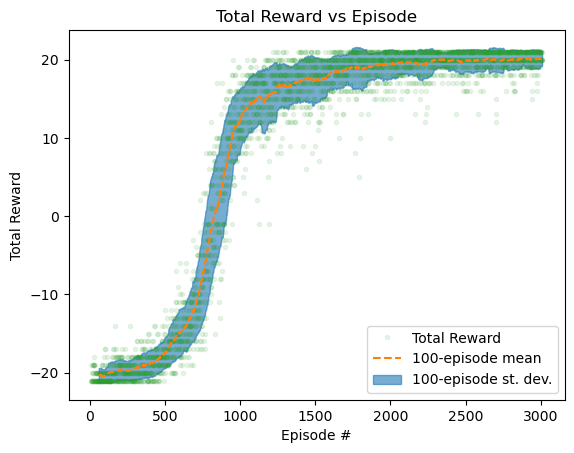

In [60]:
name = './figures/episode_vs_total_reward.png'
num_episodes_to_plot = 3000
plt.figure()
plt.plot(episode_arr[:num_episodes_to_plot], total_reward_arr[:num_episodes_to_plot], '.', alpha=0.1, color='C2', label='Total Reward')
# plot size-episode moving average via convolution
size = 100
window = np.ones(size)/size
total_reward_arr_smooth = np.convolve(total_reward_arr, window, 'same')
plt.plot(episode_arr[size//2:num_episodes_to_plot], total_reward_arr_smooth[size//2:num_episodes_to_plot], '--', color='C1', label=f'{size}-episode mean')
# plot standard deviation
total_reward_arr_std = np.zeros(num_episodes)
for i in range(num_episodes):
    total_reward_arr_std[i] = np.std(total_reward_arr[max(0, i-size//2):min(num_episodes, i+size//2)])
plt.fill_between(episode_arr[size//2:num_episodes_to_plot], total_reward_arr_smooth[size//2:num_episodes_to_plot]-total_reward_arr_std[size//2:num_episodes_to_plot], total_reward_arr_smooth[size//2:num_episodes_to_plot]+total_reward_arr_std[size//2:num_episodes_to_plot], alpha=0.6, color='C0', label=f'{size}-episode st. dev.')
plt.title('Total Reward vs Episode')
plt.xlabel('Episode #')
plt.ylabel('Total Reward')
plt.legend()
# plt.yscale('log')
# plt.xscale('log')
if name is not None:
    plt.savefig(name, dpi=300, bbox_inches='tight')
plt.show()

In [66]:
max_idx = np.max(np.where(episode==num_episodes_to_plot)[0])

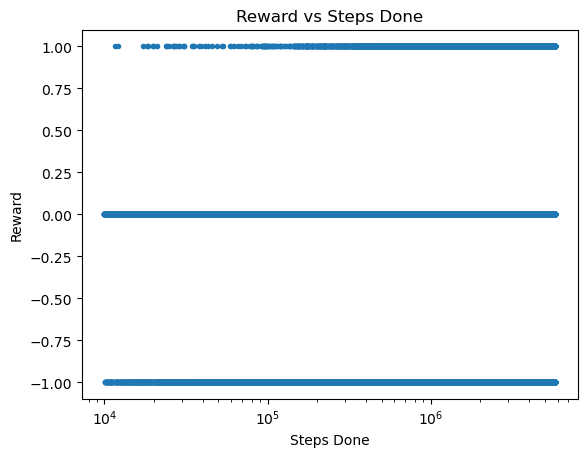

In [67]:
name = './figures/step_vs_reward.png'
plot(steps_done[:max_idx], reward[:max_idx], 'Reward vs Steps Done', 'Steps Done', 'Reward', logarithmic_x=True, name=name)

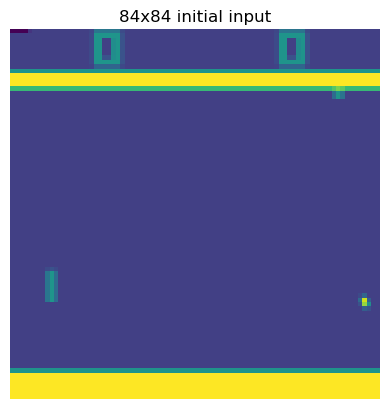

In [74]:
frame_id = 1
frame_shape = env.reset()[0]._frames[frame_id].shape
plt.figure()
plt.imshow(env.reset()[0]._frames[frame_id])
plt.axis('off')
plt.title(f'{frame_shape[0]}x{frame_shape[1]} initial input')
plt.savefig('./figures/pong_initial_input.png', dpi=300, bbox_inches='tight')
plt.show()

In [83]:
loss_std = np.zeros(max_idx)
for i in range(max_idx):
    loss_std[i] = np.std(loss[max(0, i-size//2):min(max_idx, i+size//2)])

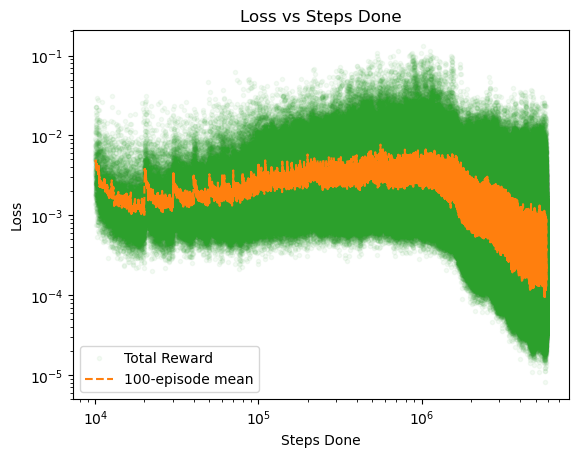

In [112]:
name = './figures/step_vs_loss.png'
# plot(steps_done[:max_idx], loss[:max_idx], 'Loss vs Steps Done', 'Steps Done', 'Loss', logarithmic_x=True, logarithmic_y=True, name=name)
plt.figure()
plt.plot(steps_done[:max_idx], loss[:max_idx], '.', alpha=0.05, color='C2', label='Total Reward')
# plot size-episode moving average via convolution
size = 100
window = np.ones(size)/size
loss_smooth = np.convolve(loss, window, 'same')
plt.plot(steps_done[size//2:max_idx], loss_smooth[size//2:max_idx], '--', color='C1', label=f'{size}-episode mean')
# plot standard deviation
# plt.fill_between(steps_done[size//2:max_idx], loss_smooth[size//2:max_idx]-loss_std[size//2:max_idx], loss_smooth[size//2:max_idx]+loss_std[size//2:max_idx], alpha=0.6, color='C0', label=f'{size}-episode st. dev.')
plt.title('Loss vs Steps Done')
plt.xlabel('Steps Done')
plt.ylabel('Loss')
plt.legend()
plt.yscale('log')
plt.xscale('log')
if name is not None:
    plt.savefig(name, dpi=300, bbox_inches='tight')
plt.show()

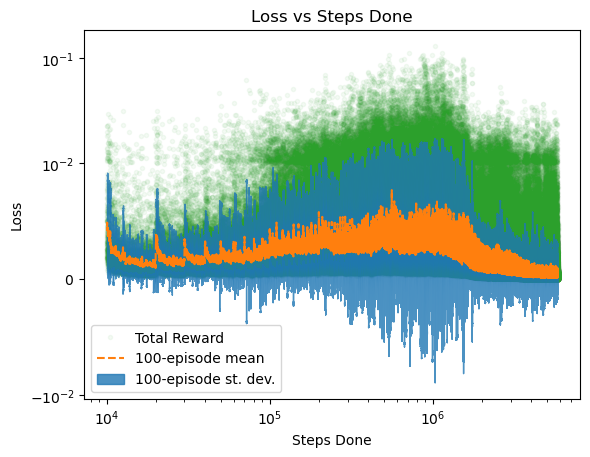

In [115]:
name = './figures/step_vs_loss.png'
interval = 1
plt.figure()
plt.plot(steps_done[:max_idx:interval], loss[:max_idx:interval], '.', alpha=0.05, color='C2', label='Total Reward', zorder=-100)
# plot size-episode moving average via convolution
size = 100
window = np.ones(size)/size
loss_smooth = np.convolve(loss, window, 'same')
plt.plot(steps_done[size//2:max_idx:interval], loss_smooth[size//2:max_idx:interval], '--', color='C1', label=f'{size}-episode mean')
# plot standard deviation
plt.fill_between(steps_done[size//2:max_idx:interval], loss_smooth[size//2:max_idx:interval]-loss_std[size//2:max_idx:interval], loss_smooth[size//2:max_idx:interval]+loss_std[size//2:max_idx:interval], alpha=0.8, color='C0', label=f'{size}-episode st. dev.')
plt.title('Loss vs Steps Done')
plt.xlabel('Steps Done')
plt.ylabel('Loss')
plt.legend(loc='lower left')
plt.yscale('symlog', linthresh=0.01)
plt.xscale('log')
if name is not None:
    plt.savefig(name, dpi=300, bbox_inches='tight')
plt.show()